# Unsupervised Learning

ML Lab 9

Unsupervised Learning (Clustering)

K-means, Heriarchical, DBSCAN

---



Vemula Ananya

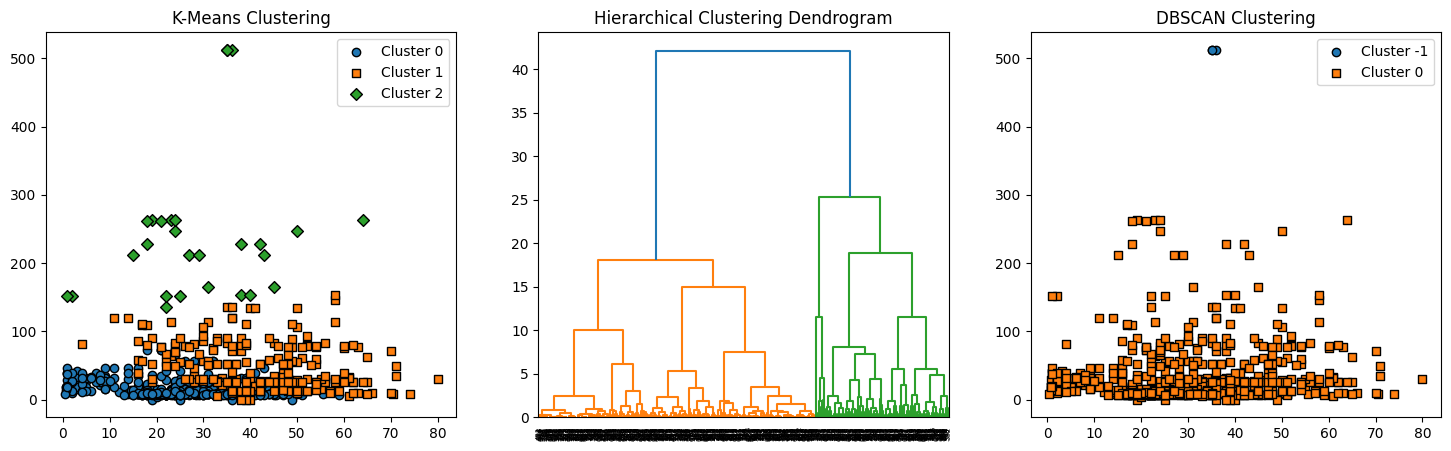

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load Titanic dataset
df = pd.read_csv("TitanicDataset.csv")

# Select numerical features for clustering (modify as needed)
features = ["Age", "Fare", "Pclass"]
df = df[features].dropna()

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# ---- K-Means Clustering ----
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# ---- Hierarchical Clustering ----
hc = AgglomerativeClustering(n_clusters=3)
df['HC_Cluster'] = hc.fit_predict(data_scaled)

# ---- DBSCAN ----
dbscan = DBSCAN(eps=1.2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# ---- Visualization ----
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define markers for different clusters
markers = ['o', 's', 'D', 'P', 'X', '^', 'v', '<', '>']

# Function to plot clusters with different markers
def plot_with_markers(ax, x, y, clusters, title):
    unique_clusters = np.unique(clusters)
    for i, cluster in enumerate(unique_clusters):
        mask = clusters == cluster
        ax.scatter(x[mask], y[mask], label=f'Cluster {cluster}', marker=markers[i % len(markers)], edgecolors='black')
    ax.set_title(title)
    ax.legend()

# K-Means plot
plot_with_markers(axes[0], df['Age'], df['Fare'], df['KMeans_Cluster'], "K-Means Clustering")

# Hierarchical Clustering Dendrogram
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix, ax=axes[1])
axes[1].set_title("Hierarchical Clustering Dendrogram")

# DBSCAN plot
plot_with_markers(axes[2], df['Age'], df['Fare'], df['DBSCAN_Cluster'], "DBSCAN Clustering")

plt.show()

